In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

In [2]:
# Load dataset
df = pd.read_csv("./Binary.csv")

In [3]:
# Split dataset into features (X) and target (Y)
X = df.drop(columns=['target'])  # Drop target column
y = df['target']

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Train SVM model
svm_model = SVC(kernel='rbf', probability=True)  # Linear Kernel
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [6]:
# Predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

In [7]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [8]:
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9300
Recall: 1.0000
F1 Score: 0.9637


In [9]:
# Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 9  7]
 [ 0 93]]


In [10]:
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9358
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.93      1.00      0.96        93

    accuracy                           0.94       109
   macro avg       0.97      0.78      0.84       109
weighted avg       0.94      0.94      0.93       109



In [11]:
# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Compute Sensitivity & Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 1.0000
Specificity: 0.5625


(array([0.5, 1.5]), [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

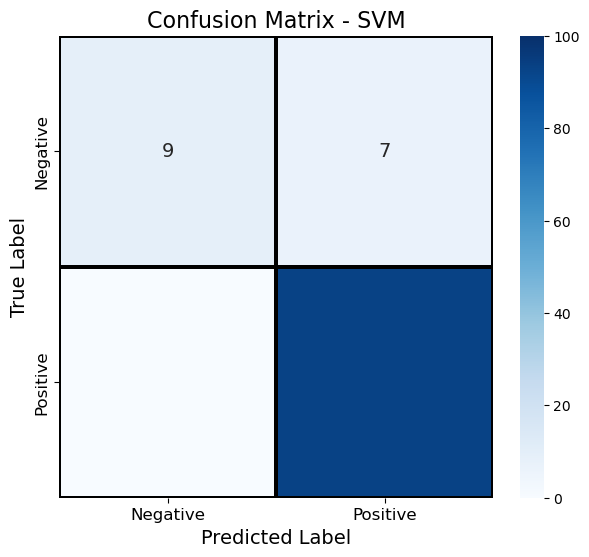

In [12]:
# Plot Confusion Matrix
plt.figure(figsize=(7,6))  # Increase figure size
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', 
                 linewidths=1.5, linecolor='black', 
                 annot_kws={"size": 14}, vmin=0, vmax=100,
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])


plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - SVM", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

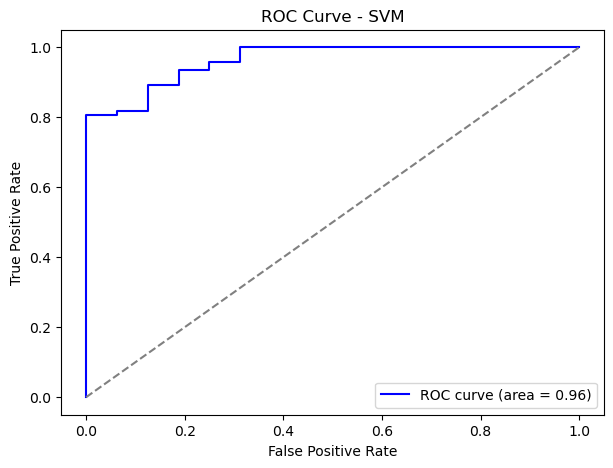

In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

**Support Vector Machines - Built From Scratch**

In [37]:
class ScratchSVM:
    def __init__(self, lr=0.01, lambda_param=0.001, n_iters=1000, kernel=None):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.kernel = kernel  # Can be 'poly' or 'rbf'
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels from {0,1} to {-1,1}
        y = np.where(y == 0, -1, 1)

        # Apply Kernel if specified
        if self.kernel == "poly":
            X = self.polynomial_kernel(X, degree=3)
        elif self.kernel == "rbf":
            X = self.rbf_kernel(X, X, gamma=0.1)  

        # Initialize weights
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for i in range(n_samples):
                margin = y[i] * (np.dot(X[i], self.w) + self.b)
                if margin >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)  # Regularization
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(X[i], y[i]))
                    self.b -= self.lr * y[i]

        print("Shape of X:", X.shape)  
        print("Shape of self.w:", self.w.shape)

    def predict(self, X_test):
        # Apply Kernel if specified
        if self.kernel == "poly":
            X_test = self.polynomial_kernel(X_test,self.X_train, degree=3)
        elif self.kernel == "rbf":
            X_test = self.rbf_kernel(X_test, self.X_train, gamma=0.1)  # Fix transformation

        # Compute predictions
        approx = np.dot(X, self.w) + self.b
        

        return np.sign(approx)

    @staticmethod
    def polynomial_kernel(X, degree=3):
        return (np.dot(X, X.T) + 1) ** degree

    @staticmethod
    def rbf_kernel(self, X1, X2, gamma=0.1):
        """
        Computes the RBF (Gaussian) Kernel between two sets of vectors.
        """
        sq_dist = np.sum(X1**2, axis=1, keepdims=True) - 2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1)
        return np.exp(-gamma * sq_dist)

In [38]:
# Train the SVM
svm = ScratchSVM(lr=0.01, lambda_param=0.001, n_iters=1000, kernel="rbf")  # Try "poly" or "rbf"
svm.fit(X_train, y_train)

TypeError: ScratchSVM.rbf_kernel() missing 1 required positional argument: 'X2'

In [32]:
# Predictions
y_pred = svm.predict(X_test)

# Convert predictions from {-1, 1} to {0,1}
y_pred = np.where(y_pred == -1, 0, 1)

ValueError: shapes (109,109) and (435,) not aligned: 109 (dim 1) != 435 (dim 0)

In [23]:
# Convert back to 0,1
y_pred_scratch = np.where(y_pred_scratch == -1, 0, 1)

In [25]:
# Performance Metrics
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch, zero_division=1)
recall_scratch = recall_score(y_test, y_pred_scratch)
f1_scratch = f1_score(y_test, y_pred_scratch)

In [26]:
print(f"Scratch SVM - Accuracy: {accuracy_scratch:.4f}")
print(f"Scratch SVM - Precision: {precision_scratch:.4f}")
print(f"Scratch SVM - Recall: {recall_scratch:.4f}")
print(f"Scratch SVM - F1 Score: {f1_scratch:.4f}")

Scratch SVM - Accuracy: 0.1468
Scratch SVM - Precision: 1.0000
Scratch SVM - Recall: 0.0000
Scratch SVM - F1 Score: 0.0000


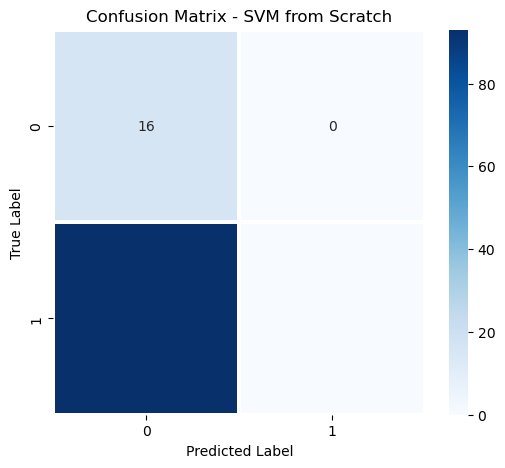

In [18]:
# Confusion Matrix
cm_scratch = confusion_matrix(y_test, y_pred_scratch)
# Plot Confusion Matrix
plt.figure(figsize=(7,6))  # Increase figure size
ax = sns.heatmap(cm_scratch, annot=True, fmt='.0f', cmap='viridis', 
                 linewidths=1.5, linecolor='black', 
                 annot_kws={"size": 14}, vmin=0, vmax=100,
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])


plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import pandas as pd
from sklearn.model_selection import train_test_split

In [52]:
class ScratchSVM:
    def __init__(self, C=1.0, kernel="linear", degree=3, gamma=None, n_iters=1000):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.n_iters = n_iters
        self.alpha = None
        self.b = 0
        self.w = None

    def compute_kernel(self, X1, X2):
        if self.kernel == "linear":
            return np.dot(X1, X2.T)
        elif self.kernel == "poly":
            return (1 + np.dot(X1, X2.T)) ** self.degree
        elif self.kernel == "rbf":
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]
            X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
            X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
            K = np.exp(-self.gamma * (X1_sq + X2_sq - 2 * np.dot(X1, X2.T)))
            return np.clip(K, 1e-10, 1e10)  # Prevent overflow
        else:
            raise ValueError("Unsupported kernel")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y == 0, -1, 1)  # Convert {0,1} to {-1,1}
        K = self.compute_kernel(X, X)

        # Initialize Lagrange multipliers
        self.alpha = np.zeros(n_samples)

        for _ in range(self.n_iters):
            for i in range(n_samples):
                margin = y[i] * (np.sum(self.alpha * y * K[:, i]) + self.b)
                if margin < 1:
                    self.alpha[i] += self.C * (1 - margin)

        # Compute weights (for linear kernel only)
        if self.kernel == "linear":
            self.w = np.sum(self.alpha * y[:, None] * X, axis=0)

        # Compute bias
        support_vectors = (self.alpha > 1e-5)
        self.b = np.mean(y[support_vectors] - np.dot(K[support_vectors, :], self.alpha * y))

    def predict_scores(self, X):
        """Returns decision function values instead of labels"""
        K = self.compute_kernel(X, X_train)  # Compute kernel matrix with training data
        return np.dot(K, self.alpha * y_train) + self.b  # No sign function


In [53]:
# Load the dataset
df = pd.read_csv("Binary.csv")

In [54]:
# Separate features and target
X = df.drop(columns=["target"]).values  # Replace 'target' with the actual column name
y = df["target"].values

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Train the SVM with best parameters
svm = ScratchSVM(C=1.0, kernel="poly", degree=3, gamma=0.1, n_iters=5000)
svm.fit(X_train, y_train)

C:\Users\Sriharish\AppData\Local\Temp\ipykernel_16140\1617849947.py:37: RuntimeWarning: overflow encountered in multiply
  margin = y[i] * (np.sum(self.alpha * y * K[:, i]) + self.b)
c:\Users\Sriharish\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [58]:
# Predict and evaluate
y_pred_scratch = svm.predict_scores(X_test)
y_pred_scratch = np.where(y_pred_scratch == -1, 0, 1)

C:\Users\Sriharish\AppData\Local\Temp\ipykernel_16140\1617849947.py:52: RuntimeWarning: invalid value encountered in multiply
  return np.dot(K, self.alpha * y_train) + self.b  # No sign function


In [59]:
# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_scratch)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_scratch, average="binary",zero_division=1)
cm = confusion_matrix(y_test, y_pred_scratch)

In [60]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8624
Precision: 0.8624
Recall: 1.0000
F1 Score: 0.9261


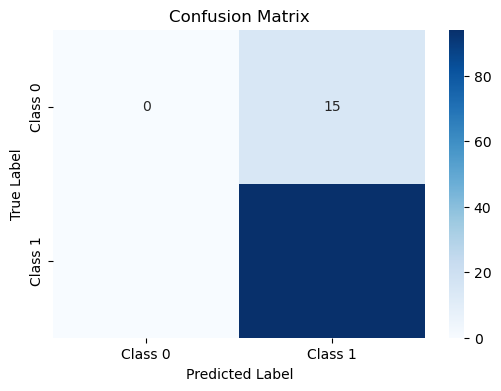

In [61]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()